<a href="https://colab.research.google.com/github/shivani1410/AI-Assignment/blob/main/ComputerVisionAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Canny Edge Detection**

In [11]:
import matplotlib.pyplot as plt
import PIL.Image
import scipy.misc
import numpy as np
import scipy.stats as st
from math import atan
from math import degrees
import math


Calculate Height and Width

In [12]:
def getWidth(img):
    return len(img[0])

def getHeight(img):
    return len(img)

## Noise Reduction

In [13]:
K = 3
def gKernal(len_kernal=21, signma=30):
    interval = (2*signma+1.)/(len_kernal)
    x = np.linspace(-signma-interval/2., signma+interval/2., len_kernal+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

def GaussianCoefficients(sigma):
    return gKernal(2*K+1,sigma)

## Gradient Calculations

In [14]:
def getSx():
    return np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

def getSy():
    return np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

def calFilter(kernel, pixel, k):
    total = 0
    for x in range(0, 2*k+1):
        for y in range(0, 2*k+1):
            total = total + kernel[x][y]*pixel[x][y]
    return total

def filter(kernel, imageArray, k):
    width = getWidth(imageArray)
    height = getHeight(imageArray)
    result = np.empty([height - 2*k, width - 2*k])
    for x in range(k, width -2*k):
        for y in range(k, height -2*k):
            result[y][x] = calFilter(kernel, imageArray[y-k:y+k+1,x-k:x+k+1], k)
    return result

def calMagnituteAndDegree(X, Y):
    width = getWidth(X)
    height = getHeight(X)
    mag = np.empty([height, width])
    degree = np.empty([height, width])
    for x in range(0, width):
        for y in range(0, height):
            mag[y][x] = math.sqrt(X[y][x] * X[y][x] + Y[y][x] * Y[y][x])
            degree[y][x] = atan(Y[y][x]/X[y][x])
    degree = (np.round(degree * (5.0 / np.pi)) + 5) % 5
    return mag, degree

## Non-Maximum Supression

In [15]:
def nonMaximumSupression(image,gradientDegree):
    width = getWidth(image)
    height = getHeight(image)
    for x in range(0,width):
        for y in range(0,height):
            if x == 0 or y == height -1 or y == 0 or x == width -1:
                image[y][x] = 0
                continue
            direction = gradientDegree[y][x] % 4
            if direction == 0:
              if image[y][x] <= image[y][x-1] or image[y][x] <= image[y][x+1]:
                image[y][x] = 0
            if direction == 1:
              if image[y][x] <= image[y-1][x+1] or image[y][x] <= image[y+1][x-1]:
                image[y][x] = 0
            if direction == 2:
              if image[y][x] <= image[y-1][x] or image[y][x] <= image[y+1][x]:
                image[y][x] = 0
            if direction == 3:
              if image[y][x] <= image[y-1][x-1] or image[y][x] <= image[y+1][x+1]:
                image[y][x] = 0
    return image


## Double Thresholding

In [16]:
def doubleThreshold(image, lowThreshold, highThreshold):
    image[np.where(image > highThreshold)] = 255
    image[np.where((image >= lowThreshold) & (image <= highThreshold))] = 75
    image[np.where(image < lowThreshold)] = 0
    return image

## Edge Linking

In [17]:
def edgeLinking(image):
    width = getWidth(image)
    height = getHeight(image)
    for i in range(0, height):
        for j in range(0, width):
            if image[i][j] == 75:
                if ((image[i+1][j] == 255) or (image[i - 1][j] == 255) or (image[i][j + 1] == 255) or (image[i][j - 1] == 255) or (image[i+1][j + 1] == 255) or (image[i-1][j - 1] == 255)):
                    image[i][j] = 255
                else:
                    image[i][j] = 0
    return image

## Canny Edge Detection

In [18]:
def cannyEdgeDetector(src, sigma, lowThreshold, highThreshold):
    img=PIL.Image.open(src)
    grayscale_image = img.convert("L")
    output=np.array(grayscale_image)
    output = filter(GaussianCoefficients(sigma), output, K)
    output = output.astype(np.int64)
    sx = filter(getSx(), output, 1)
    sy = filter(getSy(), output, 1)
    gradientMagnitute, gradientdegree = calMagnituteAndDegree(sx, sy)
    supressed = nonMaximumSupression(gradientMagnitute, gradientdegree)
    thresholded = doubleThreshold(supressed, lowThreshold, highThreshold)
    output = edgeLinking(thresholded)
    return output

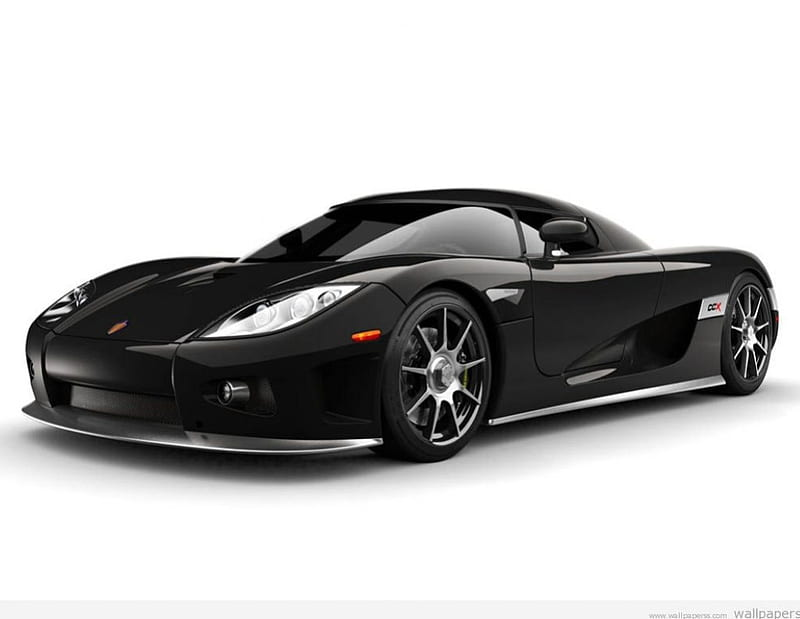

In [25]:
from IPython.display import Image
Image(filename='/content/blackcar.jpg')

<ipython-input-14-4e896f04d889>:30: RuntimeWarning: overflow encountered in scalar multiply
  mag[y][x] = math.sqrt(X[y][x] * X[y][x] + Y[y][x] * Y[y][x])
<ipython-input-14-4e896f04d889>:31: RuntimeWarning: invalid value encountered in scalar divide
  degree[y][x] = atan(Y[y][x]/X[y][x])
<ipython-input-14-4e896f04d889>:31: RuntimeWarning: divide by zero encountered in scalar divide
  degree[y][x] = atan(Y[y][x]/X[y][x])
<ipython-input-14-4e896f04d889>:31: RuntimeWarning: overflow encountered in scalar divide
  degree[y][x] = atan(Y[y][x]/X[y][x])


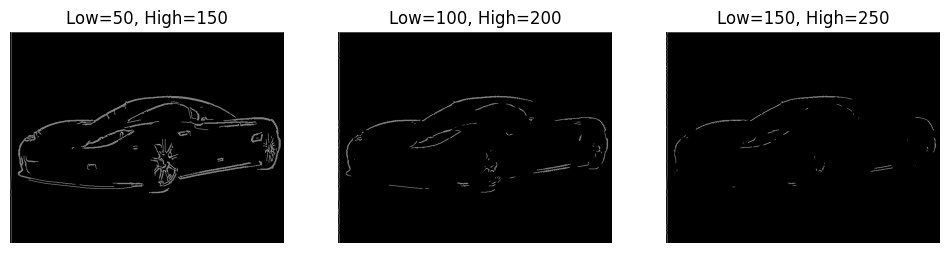

In [20]:
image_path='/content/blackcar.jpg'
low_threshold=[50,100,150]
high_threshold=[150,200,250]

images = []
titles = []

for low,high in zip(low_threshold,high_threshold):
  canny_output=cannyEdgeDetector(image_path, 1, low, high)
  images.append(canny_output)
  titles.append(f"Low={low}, High={high}")

plt.figure(figsize=(12, 8))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
plt.show()

### Observation

**1. Low Threshold=50 High Threshold=150**

Low threshold(50) detect more edges as it captures weaker edges, high threshold(150) includes medium intensity gradient. This threshold set is good for capturing great details but it also includes some noise

**2. Low Threshold=100 High Threshold=200**

This threshold set doesn't capture detailed edges because higher threshold criteria eleminate weaker gradient. It shows dark edges which represents stronger transitions in image. It captures fine outline and filter out the some noise

**3. Low Threshold=150 High Threshold=250**

It excludes weak edges and accepts minimum noise. The high threshold only detects strong edges.
This threshold set is good for detecting important elements though it may exclude minor details


<ipython-input-18-d7dfb1dbe062>:12: RuntimeWarning: invalid value encountered in cast
  output = output.astype(np.int64)
<ipython-input-14-4e896f04d889>:11: RuntimeWarning: overflow encountered in scalar multiply
  total = total + kernel[x][y]*pixel[x][y]
<ipython-input-14-4e896f04d889>:11: RuntimeWarning: overflow encountered in scalar add
  total = total + kernel[x][y]*pixel[x][y]
<ipython-input-14-4e896f04d889>:30: RuntimeWarning: overflow encountered in scalar multiply
  mag[y][x] = math.sqrt(X[y][x] * X[y][x] + Y[y][x] * Y[y][x])
<ipython-input-14-4e896f04d889>:31: RuntimeWarning: overflow encountered in scalar divide
  degree[y][x] = atan(Y[y][x]/X[y][x])
<ipython-input-14-4e896f04d889>:31: RuntimeWarning: divide by zero encountered in scalar divide
  degree[y][x] = atan(Y[y][x]/X[y][x])
<ipython-input-14-4e896f04d889>:31: RuntimeWarning: invalid value encountered in scalar divide
  degree[y][x] = atan(Y[y][x]/X[y][x])


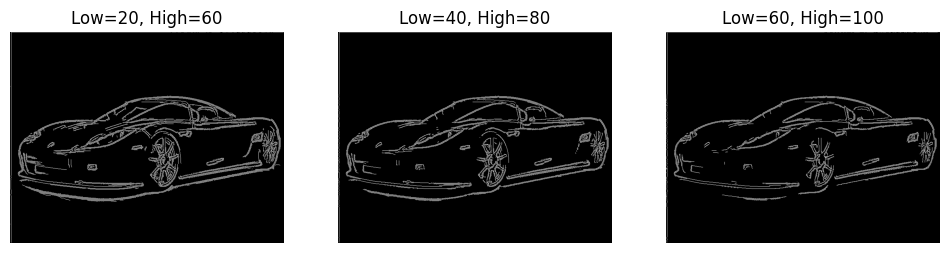

In [22]:
image_path='/content/blackcar.jpg'
low_threshold=[20,40,60]
high_threshold=[60,80,100]

images = []
titles = []

for low,high in zip(low_threshold,high_threshold):
  canny_output=cannyEdgeDetector(image_path, 1, low, high)
  images.append(canny_output)
  titles.append(f"Low={low}, High={high}")

plt.figure(figsize=(12, 8))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
plt.show()

**1. Low Threshold=20 High Threshold=60**

Low threshold values helps in detecting large number of edges, it captures weak gradients along with strong edges which gives detailed outline of object.
Low threshold values include some noise because it identifies intensity fluctuation as edges.
This is useful when small details are important but it includes a lot of noise

**2. Low Threshold=40 High Threshold=80**

All edges are not detected. this threshold filters out weak edges. This only keeps actual image edges while reducing noise. It balances details and clarity, it can be applied on the task that requires clear outline

**3. Low Threshold=60 High Threshold=100**

It is good at detecting strongest edges. It eleminates weaker gradients and minor details. it reduces noise but excludes fine features. It can be applied to focus on clean and prominent edges of object


# **5.Real-World Application Analysis**

Canny Edge Detection is widely used in medical imaging to detect edges and structures in X-ray scan, MRI scan and CT images. It identifies tumors, blood vessels or fractures by focusing the edges that represent the anatomical boundaries

**Why Edge Detection is Important:**

**1.Highlighting Structures:** Medical images contain fine difference in intensities between adjacent regions for example between tissues, organs. Transitions are enhanced edge detection which makes it easier to detect critical structures.

**2.Noise Reduction:** Due to scanning limitations and environmental factors, medical images have quite some noise. Canny image detection algorithm Gaussian smoothing reduces noise and improve clarity in detecting edges

**3.Quantitative Analysis:** It accurately detects the edges for precise size of shapes, areas and volumes, which are critical for diagnosis and treatment planning

**How It Enhances the Outcome:**

**1.Improved Diagnosis:** It helps radiologists to detect abnormalities like tumor boundaries or fractures by highlighting edges. It helps in clearly identifying anatomical features which helps in early and accurate diagnosis.

**2.Automated Analysis:** AI tools uses edge detection as preprocessing task for image segmentation like identifying organs or lesions which helps in minimizing human error.

**3.Enhanced Visualization:** It helps in visualizing complex structures like blood vessels in angiograms or bone structures in X-rays, it eliminates unnecessary information and focus on critical boundaries

Canny Edge Detection can trace the boundary of tumor and normal brain tissue in brain MRI scan. This is important for planning surgeries or monitoring the progress of cancer
Accurate detection of edge helps doctors to analyze and interpret scans for better treatment of patient.

**Other Applications include**

**1.Document Scanning and Text Recognition**

Application: Digitizing documents and enabling Optical Character Recognition (OCR)

Why Canny Helps:
It detects edges of text and documents for better segmentation.
It emphasize the character by removing the background

**2.Object Recognition in Robotics**

Application: Ite helps robots in detecting and interacting with objects in their environment

Why Canny Helps: Hightlights boundaries of object which helps in accurately detecting and segmenting objects
It is important for tasks like picking objects from cluttered background

**3.Autonomous Vehicles:**

Application: Lane , obstacle detection

Why Canny Helps: It helps in detecting boundaries of road, lane marking and objects on road like pedestrians or other vehicles
It helps in navigation and collision avoidance alogrithms